<center><font size="+4">IProML 2021/2022</font></center>
<center><font size="+4">Introduction to Programming and</font></center>
<center><font size="+4">Machine Learning in Python</font></center>
<center><font size="+4">MODULE 2</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin <a href= "mailto:a.vandin@santannapisa.it">a.vandin@santannapisa.it</a>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Daniele Licari <a href= "mailto:a.vandin@santannapisa.it">d.licari@santannapisa.it</a></font></center>

---

# NLP Project
Text analysis and classification in Python 
![](https://miro.medium.com/max/2756/1*-VjRrWpzzu9e3cY2Z-1evg.png)

We provide you a NPL model for “embedding” documents in a vector space.
- The meaning of a document is a vector of numbers
- Similar documents (in term of semantic and syntactic information) have similar vectors
- Similar vectors tend to have similar meanings.
- Vector models are also called “embeddings”

## The dataset
- We consider a subset of [the 20 newsgroups dataset](http://qwone.com/~jason/20Newsgroups/) that includes 3732 newsgroups posts on 4 topics:
  * sports
  * politics
  * medicine
  * computer graphics


- It contains information on 3732 posts
  - 1 textual data
  - 1 target variable on the topic

## Your Task
- __Your task is to analyze this dataset in the lines of what shown in the course__
  - The final goal is to **obtain a classifier able to predict the topic of new posts**

### A possible roadmap to follow
- **Exploratory Analysis**
  - Check Duplicates, Missing Values and No valid data (very very short texts)
  - Distribution of documents over topics
  - Average text length over topics (show them in a bar plot)
  - Distribution of the length of words and documents on the topics
  - Distribution of words (word frequency histogram)
  - Most common words in the corpus and presented then nicely with a world cloud 
    - top 50, taking inspiration from _Creation of wordclouds for COVID-related online news_, class 5 of module 1_
  - Most common words in the 4 topics and presented then nicely with 4 world cloud (top 50)
  - Multidimensional Visualization
    - Trasforms texts into numbers (don't worry, we'll provide you the functions)
    - Visualization of text documents using PCA and/or TSNE(coloring according to topics)

- **Clustering (assume we don't have the topic information)**
  - Clustering text documents using k-means  
  - Visualizing text documents using PCA and/or TSNE(coloring according to clusters found)
  - Find and analyze centroids
  - Most common words in clusters and present then nicely with world clouds (top 50)
  
- **Text classification**
  - Trasforms texts into numbers (don't worry, we'll provide you the functions)
  - Split the dataset using stratified sampling
  - Create classification models
  - Find the best model (with hyperparameter optimization)
  - What is the model confused with?



- **EXTRA: Semantic Similarity**
  - Build a semantic search engine

## BEWARE
  - Try first to understand the data. Read the provided description. 
  - Not all datasets are the same
    - Do not just blindly apply all tasks seen in class, with the same parameters. 
    - Try to perform reasoned choices.
    -  You are free to choose part of the techniques/tools seen during the course
        - **Motivate your choices**
  - You should prepare a [colab notebook](https://colab.research.google.com/) containing your analysis
    - **Properly commenting/motivating each step with suitable comments**
    - Similarly to what we do in the jupyterLab notebooks we use in our classes Classifying text documents into 5 news groups:
    - **We suggest you use Colab for this project**








# Exploratory Analysis

## LOAD DATASET


In [ ]:
# We retrieve the dataset
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

def load_project_dataset():
    # 4 topic
    categories = ['talk.politics.misc',  'comp.graphics', 'sci.med','rec.sport.baseball']
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),  categories=categories)
    # We load the dataset into dataframe
    df_newsgroups = pd.DataFrame(zip(newsgroups.data,[newsgroups.target_names[i] for i in newsgroups.target]), columns=['text','topic'])
    return df_newsgroups

df_newsgroups = load_project_dataset()
df_newsgroups.head()

,text,topic
0,\nI guess I'm still not clear on what the term...,sci.med
1,Could someone give me some information on the ...,sci.med
2,sandiego and graig nettles\n\n\n,rec.sport.baseball
3,Hi there\n\nI am very interested in Rayshade 4...,comp.graphics
4,Here is a press release from the Natural Resou...,sci.med


## Check quality of data
 - Duplicate entries
 - Check for missing values (empty text)
 - No valid data (very very short texts)
 - Clean special characters (e.g. '\n') in text

In [ ]:
df_newsgroups[df_newsgroups.text.duplicated()] # duplicates?
# df_newsgroups[df_newsgroups.text==''] # empty text

,text,topic
40,\n,rec.sport.baseball
112,,rec.sport.baseball
131,,comp.graphics
218,\n,talk.politics.misc
318,,rec.sport.baseball
...,...,...
3392,,rec.sport.baseball
3441,,sci.med
3504,"Hello,",sci.med
3561,,comp.graphics


In [ ]:
df_newsgroups['len']=df_newsgroups.text.apply(lambda x: len(x))
df_newsgroups

,text,topic,len
0,\nI guess I'm still not clear on what the term...,sci.med,1002
1,Could someone give me some information on the ...,sci.med,135
2,sandiego and graig nettles\n\n\n,rec.sport.baseball,29
3,Hi there\n\nI am very interested in Rayshade 4...,comp.graphics,738
4,Here is a press release from the Natural Resou...,sci.med,7318
...,...,...,...
3727,"Hello, and thank you for reading this request....",comp.graphics,193
3728,Just a little something I found while reading ...,rec.sport.baseball,1850
3729,"(drieux, just drieux) writes (about the arme...",talk.politics.misc,89
3730,"\n\nHey, Clayton, it's me again! I just love ...",talk.politics.misc,286


In [ ]:
df_newsgroups.groupby('topic').len.describe()

,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
comp.graphics,973.0,1294.299075,5581.068721,0.0,214.00,380.0,734.00,61278.0
rec.sport.baseball,994.0,724.451710,1058.131411,0.0,179.25,392.5,850.25,15161.0
sci.med,990.0,1309.617172,3466.242400,0.0,287.00,557.0,1105.75,37332.0
talk.politics.misc,775.0,1723.335484,4729.033868,0.0,295.50,664.0,1346.50,49094.0


## Visualization and Trends

### Distribution of documents over topics

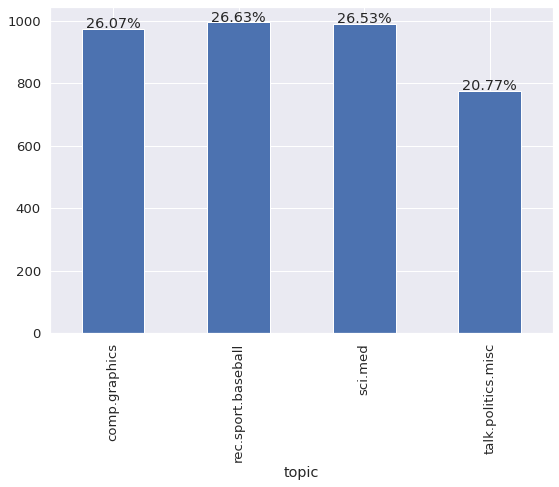

rec.sport.baseball    994
sci.med               990
comp.graphics         973
talk.politics.misc    775
Name: topic, dtype: int64

In [ ]:
plt.figure(figsize=(9,6))
ax = df_newsgroups.groupby('topic').size().plot(kind='bar')
df_y = df_newsgroups.topic

# gets shapes and draws annotations
for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format(height/len(df_y)*100), ha="center") 

plt.show()
df_y.value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


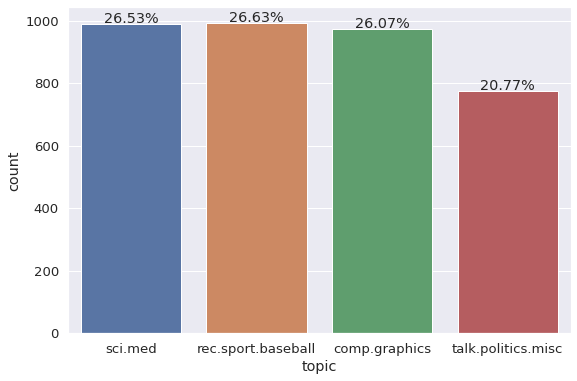

In [ ]:
# here, using seaborn
plt.figure(figsize=(9,6))

df_y = df_newsgroups.topic
#Show the counts of observations using bars.
ax = sns.countplot(df_y) # Returns the matplotlib Axes object

# gets shapes and draws annotations
for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format(height/len(df_y)*100), ha="center") 
plt.show()

In [ ]:
# ... complete the Exploratory Data Analysis

## Converting text to vectors
In order to feed predictive, PCA or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis. 

**Universal Sentence Encoder**
One of the most well-performing sentence embedding techniques is the Universal Sentence Encoder. And it should come as no surprise from anybody that it has been proposed by Google. The key feature here is that we can use it for Multi-task learning.  This means that the sentence embeddings we generate can be used for multiple tasks like sentiment analysis, text classification, sentence similarity, etc, and the results of these asks are then fed back to the model to get even better sentence vectors that before. 

**Ref.**
* [PAPER Universal Sentence Encoder](https://arxiv.org/pdf/1803.11175.pdf)
* [Top 4 Sentence Embedding Techniques using Python!](https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/)
* [Universal Sentence Encoder Visually Explained](https://amitness.com/2020/06/universal-sentence-encoder/)

<!-- ## Load USE model and convert texts into numbers -->

**NOTE**: *USE model takes a variable length English text as input and outputs a 512 dimensional vector. Similar vectors tend to have similar meanings.*

In [ ]:
#@title Choose USE model and run the cell { vertical-output: true, display-mode: "form" }
#@markdown Smaller models for faster NLP,  Larger models for more accurate NLP

!pip install -q  tensorflow_text

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

model_name = 'Large Model (English only)' #@param ['Small Model (English only)', 'Large Model (English only)','Small Model (Multilingual)', 'Large Model (Multilingual)']
models_name = ['Small Model (English only)', 'Large Model (English only)','Small Model (Multilingual)', 'Large Model (Multilingual)']
modules_url = ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5","https://tfhub.dev/google/universal-sentence-encoder-multilingual/3","https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"]

module_url = dict(zip(models_name,modules_url))[model_name]

model = hub.load(module_url)
print (f"Model {module_url} loaded (click the link for more details)" )


def embed(input):
  return model(input).numpy()

def text2vec(texts): 
  print("Converting texts into  vectors" )
  return embed(texts).tolist()

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 69.8 MB/s 
Model https://tfhub.dev/google/universal-sentence-encoder/4 loaded (click the link for more details)


In [ ]:
# converting text into vectors
df_newsgroups['vectors'] = text2vec(df_newsgroups.text.values)

# We conveted texts into numerical vectors 
df_newsgroups.head(2)

In [ ]:
X_text = df_newsgroups.text.values # text
X_vec = np.array(list(df_newsgroups.vectors.values))  # text vetors
y = df_newsgroups.topic.values #topic

**The vectors are already normalized**, so you don't have to scale them.

## Multidimensional Visualization
Visualization of text documents using PCA and/or TSNE(coloring according to topics)

In [ ]:
# Example PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_vec)


# Clustering

In [ ]:
from sklearn.cluster import KMeans


# Text classification

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, stratify=y) 


## Models Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV


# EXTRA: Semantic Similarity 
These text vectors preserve more semantic and syntactic information on texts, leading to improved performance in almost every imaginable NLP task. Similar vectors tend to have similar meanings.

<!-- - The distributional hypothesis in linguistics is derived from the semantic theory of language usage, i.e. words that are used and occur in the same contexts tend to purport similar meanings. 
- The distributional hypothesis is the basis for statistical semantics. -->

<!-- Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`. -->
We can compute the similarity between vector lists by calculating the cosine angle between the two vector lists.

[The cosine similarity measures](https://en.wikipedia.org/wiki/Cosine_similarity) : 

$similarity(A,B)={\mathbf {A}  \cdot \mathbf {B} \over  \|\mathbf {A} \|\|\mathbf {B} \| }$






In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Dd16LVt5ct4?start=132" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Example 1: How to calculate the similarity matrix of texts using the cosine

Converting texts into  vectors


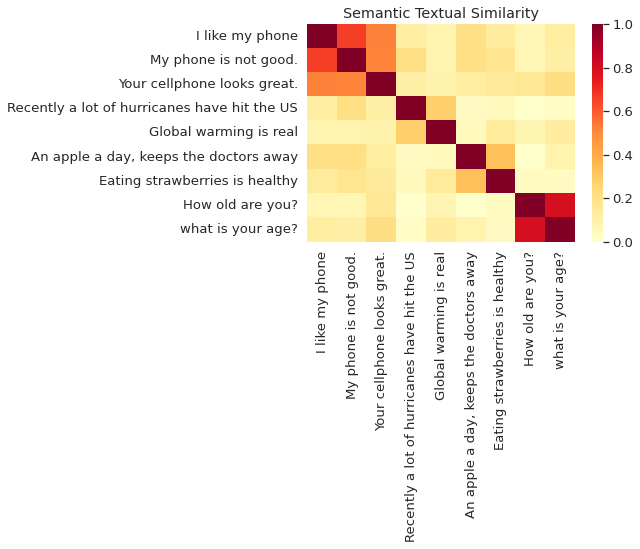

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity  # for cosine similarity
# function to plot similarity matrix
def plot_similarity(texts, similarity, rotation=90):
  sns.set(font_scale=1.2)
  g = sns.heatmap( similarity,
      xticklabels=texts,yticklabels=texts,
      vmin=0,vmax=1,cmap="YlOrRd")
  g.set_xticklabels(texts, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
      
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

# converts texts into vectors
messages_vectors = text2vec(messages)

# computes the similarity matrix using cosine similarity 
similarity_matrix = cosine_similarity(messages_vectors,messages_vectors)
# plot semantic similarity
plot_similarity(messages,similarity_matrix)

## Example 2: Search for similar text on the newsgroup dataset

In [ ]:
my_post = "Virus-induced immune dysregulation as a triggering factor for the development of drug rashes and autoimmune diseases: with emphasis on EB virus."
# convert text into vector
my_post_vector = text2vec([my_post])
# computes similarity matrix between mypost and project dataset
matrix_similarity = cosine_similarity(my_post_vector,X_vec)

print('Most similar text from project dataset')
# gets positional index with max similarity from project dataset 
id_most_similar = np.argmax(matrix_similarity[0])
# print most similar text
print(X_text[id_most_similar])

## Extra assignment
Try to create a search function that takes a string (query) as input and returns the 5 texts of the newsgroup dataset most similar to the query